<a href="https://colab.research.google.com/github/Rosvend/Passenger-flow-prediction-LSTM/blob/main/LSTM_Metro_passenger_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LSTM (Long short-term memory) para la prediccion a corto plazo del flujo de pasajeros en la red metro de Medellin, Antioquia.**

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
from ipywidgets import interact, interact_manual

In [224]:
from holidays_co import get_colombia_holidays_by_year
holidays = get_colombia_holidays_by_year(2023)
print(holidays)

[Holiday(date=datetime.date(2023, 1, 1), celebration='Año Nuevo'), Holiday(date=datetime.date(2023, 1, 9), celebration='Día de los Reyes Magos'), Holiday(date=datetime.date(2023, 3, 20), celebration='Día de San José'), Holiday(date=datetime.date(2023, 4, 6), celebration='Jueves Santo'), Holiday(date=datetime.date(2023, 4, 7), celebration='Viernes Santo'), Holiday(date=datetime.date(2023, 5, 1), celebration='Día del Trabajo'), Holiday(date=datetime.date(2023, 5, 22), celebration='Ascensión del Señor'), Holiday(date=datetime.date(2023, 6, 12), celebration='Corphus Christi'), Holiday(date=datetime.date(2023, 6, 19), celebration='Sagrado Corazón de Jesús'), Holiday(date=datetime.date(2023, 7, 3), celebration='San Pedro y San Pablo'), Holiday(date=datetime.date(2023, 7, 20), celebration='Día de la Independencia'), Holiday(date=datetime.date(2023, 8, 7), celebration='Batalla de Boyacá'), Holiday(date=datetime.date(2023, 8, 21), celebration='La Asunción de la Virgen'), Holiday(date=datetime.d

In [225]:
from holidays_co import is_holiday_date
import datetime

date = datetime.date(2024,5,13) #Lunes festivo 13 de mayo 2024 como ejemplo (Dia de la Ascencion)

print(date)
is_holiday_date(date)

2024-05-13


True

In [226]:
print('Descargando archivos...')
!curl -L "https://drive.google.com/uc?id=1Vk3kISIRnWhpF55VAlsXiaBC7-2VS7mp&export=download" -o Afluencia2024.xlsx
!curl -L "https://drive.google.com/uc?id=1rawKGyqGLCjhYsE1oePv499lQdawN3zX&export=download" -o Afluencia2023.xlsx
!curl -L "https://drive.google.com/uc?id=11VeQzlInoljZKKil7kPcWjwvESCZbMSv&export=download" -o Afluencia2022.xlsx
!curl -L "https://drive.google.com/uc?id=1zWP6FHA6aTJJ58xy119k5tAQRxI3DEIF&export=download" -o Afluencia2021.xlsx
!curl -L "https://drive.google.com/uc?id=1klQ3qzRFX2-jpkc4Nh8wLIo6weFKQ6Pa&export=download" -o Afluencia2020.xlsx
!curl -L "https://drive.google.com/uc?id=1PsQvhT1bt6-xr5vG1Xi95aHBg2anYI51&export=download" -o Afluencia2019.xlsx

Descargando archivos...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 60500  100 60500    0     0  54761      0  0:00:01  0:00:01 --:--:--   97k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  659k  100  659k    0     0   458k      0  0:00:01  0:00:01 --:--:-- 92.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  648k  100  648k    0     0   375k      0  0:00:01  0:00:01 --:--:-- 3729k
  % Total    % Received % Xf

In [227]:
df2019 = pd.read_excel('/content/Afluencia2019.xlsx',engine='openpyxl')
df2020 = pd.read_excel('/content/Afluencia2020.xlsx',engine='openpyxl')
df2021 = pd.read_excel('/content/Afluencia2021.xlsx',engine='openpyxl')
df2022 = pd.read_excel('/content/Afluencia2022.xlsx',engine='openpyxl')
df2023 = pd.read_excel('/content/Afluencia2023.xlsx',engine='openpyxl')
df2024 = pd.read_excel('/content/Afluencia2024.xlsx',engine='openpyxl')
df2023.head(13) #Imprimos las 12 lineas del metro

,Día,Línea de Servicio,Hora de operación,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Total general (Número de pasajeros)
1,01/01/2023,LÍNEA 1,192,811,896,716,673,922,1023,1208,...,1629,1985,2361,2694,2303,1839,1478,236,NaN,25483
2,01/01/2023,LÍNEA 2,11,123,116,95,102,144,147,189,...,191,255,280,317,252,164,111,7,NaN,3210
3,01/01/2023,LÍNEA A,1328,5104,5701,4309,4054,4852,5880,7629,...,10999,13027,15965,19123,15663,12918,9509,819,NaN,166047
4,01/01/2024,LÍNEA B,221,701,750,655,628,863,1085,1228,...,1930,2247,2498,2648,2029,1472,1087,151,NaN,25106
5,01/01/2023,LÍNEA H,NaN,NaN,NaN,NaN,NaN,56,62,49,...,55,128,99,109,68,46,27,1,NaN,970
6,01/01/2023,LÍNEA J,NaN,NaN,NaN,NaN,NaN,470,410,490,...,688,710,857,933,651,311,146,3,NaN,7209
7,01/01/2023,LÍNEA K,NaN,NaN,NaN,NaN,350,555,630,745,...,1432,1515,1788,1562,1110,766,329,4,NaN,13664
8,01/01/2023,LÍNEA L,NaN,NaN,NaN,NaN,11,61,158,364,...,617,531,428,NaN,NaN,NaN,NaN,NaN,NaN,4113
9,01/01/2023,LÍNEA M,NaN,NaN,NaN,NaN,1,156,123,176,...,229,332,319,411,408,260,240,92,NaN,3425


# Proceso de calidad de datos

In [228]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3564 non-null   object
 1   Unnamed: 1   3564 non-null   object
 2   Unnamed: 2   2937 non-null   object
 3   Unnamed: 3   2958 non-null   object
 4   Unnamed: 4   2960 non-null   object
 5   Unnamed: 5   2989 non-null   object
 6   Unnamed: 6   3426 non-null   object
 7   Unnamed: 7   3501 non-null   object
 8   Unnamed: 8   3499 non-null   object
 9   Unnamed: 9   3517 non-null   object
 10  Unnamed: 10  3513 non-null   object
 11  Unnamed: 11  3515 non-null   object
 12  Unnamed: 12  3524 non-null   object
 13  Unnamed: 13  3517 non-null   object
 14  Unnamed: 14  3525 non-null   object
 15  Unnamed: 15  3536 non-null   object
 16  Unnamed: 16  3361 non-null   object
 17  Unnamed: 17  3226 non-null   object
 18  Unnamed: 18  3230 non-null   object
 19  Unnamed: 19  3228 non-null 

In [229]:
df2019.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Día,Línea de servicio,Hora de operación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Total general (Número de pasajeros)
2,2019-01-01 00:00:00,Línea 1,12,826,1134,987,884,975,1259,1348,...,2085,2230,2636,2884,2603,2024,1257,271,5,28850
3,2019-01-02 00:00:00,Línea 1,1716,4498,6629,6284,4145,3784,3746,3854,...,4709,5750,7517,6661,4307,2975,2709,1890,135,83484
4,2019-01-03 00:00:00,Línea 1,1860,4869,7587,7088,4483,4486,4126,4136,...,5061,6093,8023,7034,4481,3244,2905,1739,124,90472


In [230]:
hour = 4
for i in range(2, 22):
    if hour < 12:
        new_column_name = f"{hour}AM"
    elif hour == 12:
        new_column_name = "12PM"
    elif hour>12:
        new_column_name = f"{hour-12}PM"

    df2019 = df2019.rename(columns={f"Unnamed: {i}": new_column_name})
    hour += 1

df2019.columns.to_list()

['Unnamed: 0',
 'Unnamed: 1',
 '4AM',
 '5AM',
 '6AM',
 '7AM',
 '8AM',
 '9AM',
 '10AM',
 '11AM',
 '12PM',
 '1PM',
 '2PM',
 '3PM',
 '4PM',
 '5PM',
 '6PM',
 '7PM',
 '8PM',
 '9PM',
 '10PM',
 '11PM',
 'Unnamed: 22']

In [231]:
df2019 = df2019.rename(columns={'Unnamed: 0':'Dia','Unnamed: 1':'Linea','Hora de operación':'4AM','Unnamed: 22':'Total_pasajeros'}) #Cambiamos el resto de columnas que faltaron
df2019 = df2019.drop([0,1])
df2019.head()

,Dia,Linea,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,...,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,Total_pasajeros
2,2019-01-01 00:00:00,Línea 1,12,826,1134,987,884,975,1259,1348,...,2085,2230,2636,2884,2603,2024,1257,271,5,28850
3,2019-01-02 00:00:00,Línea 1,1716,4498,6629,6284,4145,3784,3746,3854,...,4709,5750,7517,6661,4307,2975,2709,1890,135,83484
4,2019-01-03 00:00:00,Línea 1,1860,4869,7587,7088,4483,4486,4126,4136,...,5061,6093,8023,7034,4481,3244,2905,1739,124,90472
5,2019-01-04 00:00:00,Línea 1,1845,4989,7723,7281,4857,4583,4269,4217,...,5280,6056,7992,7081,4805,3466,3075,1900,176,93067
6,2019-01-05 00:00:00,Línea 1,1550,3852,4898,5221,4016,3815,3704,4048,...,4696,4528,4106,4377,3842,2973,2866,1983,167,75451


In [232]:
df2020.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Día,Línea de servicio,Hora de operación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Total general (Número de pasajeros)
2,2020-01-01 00:00:00,Línea 1,NaN,902,1126,881,743,924,1137,1299,...,2056,2374,2727,2908,2978,2457,1369,174,NaN,29341
3,2020-01-01 00:00:00,Línea 2,NaN,63,94,66,68,61,79,127,...,169,188,287,302,236,188,85,16,NaN,2435
4,2020-01-01 00:00:00,Línea A,1,4901,6168,4822,4158,5152,6467,8488,...,12785,15911,19522,20582,20358,16450,10701,1177,NaN,192714


In [233]:
hour = 4
for i in range(2, 22):
    if hour < 12:
        new_column_name = f"{hour}AM"
    elif hour == 12:
        new_column_name = "12PM"
    elif hour>12:
        new_column_name = f"{hour-12}PM"

    df2020 = df2020.rename(columns={f"Unnamed: {i}": new_column_name})
    hour += 1

df2020.columns.to_list()

['Unnamed: 0',
 'Unnamed: 1',
 '4AM',
 '5AM',
 '6AM',
 '7AM',
 '8AM',
 '9AM',
 '10AM',
 '11AM',
 '12PM',
 '1PM',
 '2PM',
 '3PM',
 '4PM',
 '5PM',
 '6PM',
 '7PM',
 '8PM',
 '9PM',
 '10PM',
 '11PM',
 'Unnamed: 22']

In [234]:
df2020 = df2020.rename(columns={'Unnamed: 0':'Dia','Unnamed: 1':'Linea','Hora de operación':'4AM','Unnamed: 22':'Total_pasajeros'}) #Cambiamos el resto de columnas que faltaron
df2020 = df2020.drop([0,1])
df2020.head()

,Dia,Linea,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,...,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,Total_pasajeros
2,2020-01-01 00:00:00,Línea 1,NaN,902,1126,881,743,924,1137,1299,...,2056,2374,2727,2908,2978,2457,1369,174,NaN,29341
3,2020-01-01 00:00:00,Línea 2,NaN,63,94,66,68,61,79,127,...,169,188,287,302,236,188,85,16,NaN,2435
4,2020-01-01 00:00:00,Línea A,1,4901,6168,4822,4158,5152,6467,8488,...,12785,15911,19522,20582,20358,16450,10701,1177,NaN,192714
5,2020-01-01 00:00:00,Línea B,NaN,750,863,674,693,891,1161,1600,...,2140,2775,2942,3083,2319,1738,725,39,NaN,28691
6,2020-01-01 00:00:00,Línea H,NaN,NaN,NaN,NaN,1,39,60,65,...,66,130,105,136,121,49,14,2,NaN,1030


In [235]:
df2021.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Día,Línea de servicio,Hora de operación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Total general (Número de pasajeros)
2,2021-01-01 00:00:00,LÍNEA A,NaN,3487,3405,2011,1148,974,888,1011,...,1833,2900,3269,3314,2273,1329,12,NaN,NaN,31911
3,2021-01-01 00:00:00,LÍNEA B,NaN,532,438,267,164,145,135,142,...,212,321,421,432,215,157,NaN,NaN,NaN,4050
4,2021-01-01 00:00:00,LÍNEA K,NaN,NaN,NaN,NaN,40,131,104,156,...,167,258,189,122,103,38,NaN,NaN,NaN,1714


In [236]:
hour = 4
for i in range(2, 22):
    if hour < 12:
        new_column_name = f"{hour}AM"
    elif hour == 12:
        new_column_name = "12PM"
    elif hour>12:
        new_column_name = f"{hour-12}PM"

    df2021 = df2021.rename(columns={f"Unnamed: {i}": new_column_name})
    hour += 1

df2021.columns.to_list()

['Unnamed: 0',
 'Unnamed: 1',
 '4AM',
 '5AM',
 '6AM',
 '7AM',
 '8AM',
 '9AM',
 '10AM',
 '11AM',
 '12PM',
 '1PM',
 '2PM',
 '3PM',
 '4PM',
 '5PM',
 '6PM',
 '7PM',
 '8PM',
 '9PM',
 '10PM',
 '11PM',
 'Unnamed: 22']

In [237]:
df2021 = df2021.rename(columns={'Unnamed: 0':'Dia','Unnamed: 1':'Linea','Hora de operación':'4AM','Unnamed: 22':'Total_pasajeros'}) #Cambiamos el resto de columnas que faltaron
df2021 = df2021.drop([0,1])
df2021.head()

,Dia,Linea,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,...,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,Total_pasajeros
2,2021-01-01 00:00:00,LÍNEA A,NaN,3487,3405,2011,1148,974,888,1011,...,1833,2900,3269,3314,2273,1329,12,NaN,NaN,31911
3,2021-01-01 00:00:00,LÍNEA B,NaN,532,438,267,164,145,135,142,...,212,321,421,432,215,157,NaN,NaN,NaN,4050
4,2021-01-01 00:00:00,LÍNEA K,NaN,NaN,NaN,NaN,40,131,104,156,...,167,258,189,122,103,38,NaN,NaN,NaN,1714
5,2021-01-01 00:00:00,LÍNEA J,NaN,NaN,NaN,NaN,1,77,74,92,...,146,179,132,135,69,42,3,NaN,NaN,1256
6,2021-01-01 00:00:00,LÍNEA 1,NaN,614,590,355,240,217,198,231,...,394,579,624,574,399,231,17,NaN,NaN,6104


In [238]:
df2021['Dia'] = pd.to_datetime(df2021['Dia'], format='%d/%m/%Y', errors='coerce')
df2021.head()

,Dia,Linea,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,...,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,Total_pasajeros
2,2021-01-01,LÍNEA A,NaN,3487,3405,2011,1148,974,888,1011,...,1833,2900,3269,3314,2273,1329,12,NaN,NaN,31911
3,2021-01-01,LÍNEA B,NaN,532,438,267,164,145,135,142,...,212,321,421,432,215,157,NaN,NaN,NaN,4050
4,2021-01-01,LÍNEA K,NaN,NaN,NaN,NaN,40,131,104,156,...,167,258,189,122,103,38,NaN,NaN,NaN,1714
5,2021-01-01,LÍNEA J,NaN,NaN,NaN,NaN,1,77,74,92,...,146,179,132,135,69,42,3,NaN,NaN,1256
6,2021-01-01,LÍNEA 1,NaN,614,590,355,240,217,198,231,...,394,579,624,574,399,231,17,NaN,NaN,6104


In [239]:
df2022.head()

,Día,Línea de Servicio,Hora de operación,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaT,NaN,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Total general (Número de pasajeros)
1,2022-01-01,LÍNEA 1,165,811,854,662,589,731,836,1091,...,1479,1616,1696,1911,1611,1319,923,132,NaN,20279
2,2022-01-01,LÍNEA 2,14,90,100,81,68,95,93,90,...,168,212,213,222,169,118,71,8,NaN,2265
3,2022-01-01,LÍNEA A,1098,4363,5114,3988,3385,4033,4890,6163,...,9089,10642,11322,12716,10610,8085,6333,476,NaN,126692
4,2022-01-01,LÍNEA B,195,674,767,555,565,667,921,1246,...,1599,2121,2114,2204,1526,1028,620,58,NaN,21301


In [240]:
hour = 4
for i in range(2, 22):
    if hour < 12:
        new_column_name = f"{hour}AM"
    elif hour == 12:
        new_column_name = "12PM"
    elif hour>12:
        new_column_name = f"{hour-12}PM"

    df2022 = df2022.rename(columns={f"Unnamed: {i}": new_column_name})
    hour += 1

df2022.columns.to_list()

['Día',
 'Línea de Servicio',
 'Hora de operación',
 '5AM',
 '6AM',
 '7AM',
 '8AM',
 '9AM',
 '10AM',
 '11AM',
 '12PM',
 '1PM',
 '2PM',
 '3PM',
 '4PM',
 '5PM',
 '6PM',
 '7PM',
 '8PM',
 '9PM',
 '10PM',
 '11PM',
 'Unnamed: 22']

In [241]:
df2022 = df2022.rename(columns={'Día':'Dia','Línea de Servicio':'Linea','Hora de operación':'4AM','Unnamed: 22':'Total_pasajeros'}) #Cambiamos el resto de columnas que faltaron
df2022 = df2022.drop([0])
df2022.head()

,Dia,Linea,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,...,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,Total_pasajeros
1,2022-01-01,LÍNEA 1,165,811,854,662,589,731,836,1091,...,1479,1616,1696,1911,1611,1319,923,132,NaN,20279
2,2022-01-01,LÍNEA 2,14,90,100,81,68,95,93,90,...,168,212,213,222,169,118,71,8,NaN,2265
3,2022-01-01,LÍNEA A,1098,4363,5114,3988,3385,4033,4890,6163,...,9089,10642,11322,12716,10610,8085,6333,476,NaN,126692
4,2022-01-01,LÍNEA B,195,674,767,555,565,667,921,1246,...,1599,2121,2114,2204,1526,1028,620,58,NaN,21301
5,2022-01-01,LÍNEA H,NaN,NaN,NaN,NaN,NaN,39,25,45,...,44,37,71,80,61,42,14,NaN,NaN,641


In [242]:
df2023.head()

,Día,Línea de Servicio,Hora de operación,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Total general (Número de pasajeros)
1,01/01/2023,LÍNEA 1,192,811,896,716,673,922,1023,1208,...,1629,1985,2361,2694,2303,1839,1478,236,NaN,25483
2,01/01/2023,LÍNEA 2,11,123,116,95,102,144,147,189,...,191,255,280,317,252,164,111,7,NaN,3210
3,01/01/2023,LÍNEA A,1328,5104,5701,4309,4054,4852,5880,7629,...,10999,13027,15965,19123,15663,12918,9509,819,NaN,166047
4,01/01/2024,LÍNEA B,221,701,750,655,628,863,1085,1228,...,1930,2247,2498,2648,2029,1472,1087,151,NaN,25106


In [243]:
#Cambiamos los nombres de las columnas de horas
hour = 4
for i in range(2, 22):
    if hour < 12:
        new_column_name = f"{hour}AM"
    elif hour == 12:
        new_column_name = "12PM"
    elif hour>12:
        new_column_name = f"{hour-12}PM"

    df2023 = df2023.rename(columns={f"Unnamed: {i}": new_column_name})
    hour += 1

df2023.columns.to_list()

['Día',
 'Línea de Servicio',
 'Hora de operación',
 '5AM',
 '6AM',
 '7AM',
 '8AM',
 '9AM',
 '10AM',
 '11AM',
 '12PM',
 '1PM',
 '2PM',
 '3PM',
 '4PM',
 '5PM',
 '6PM',
 '7PM',
 '8PM',
 '9PM',
 '10PM',
 '11PM',
 'Unnamed: 22']

In [244]:
df2023 = df2023.rename(columns={'Día':'Dia','Línea de Servicio':'Linea','Hora de operación':'4AM','Unnamed: 22':'Total_pasajeros'}) #Cambiamos el resto de columnas que faltaron
df2023 = df2023.drop([0]) #Borramos la primera fila
df2023.head(12)

,Dia,Linea,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,...,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,Total_pasajeros
1,01/01/2023,LÍNEA 1,192,811,896,716,673,922,1023,1208,...,1629,1985,2361,2694,2303,1839,1478,236,NaN,25483
2,01/01/2023,LÍNEA 2,11,123,116,95,102,144,147,189,...,191,255,280,317,252,164,111,7,NaN,3210
3,01/01/2023,LÍNEA A,1328,5104,5701,4309,4054,4852,5880,7629,...,10999,13027,15965,19123,15663,12918,9509,819,NaN,166047
4,01/01/2024,LÍNEA B,221,701,750,655,628,863,1085,1228,...,1930,2247,2498,2648,2029,1472,1087,151,NaN,25106
5,01/01/2023,LÍNEA H,NaN,NaN,NaN,NaN,NaN,56,62,49,...,55,128,99,109,68,46,27,1,NaN,970
6,01/01/2023,LÍNEA J,NaN,NaN,NaN,NaN,NaN,470,410,490,...,688,710,857,933,651,311,146,3,NaN,7209
7,01/01/2023,LÍNEA K,NaN,NaN,NaN,NaN,350,555,630,745,...,1432,1515,1788,1562,1110,766,329,4,NaN,13664
8,01/01/2023,LÍNEA L,NaN,NaN,NaN,NaN,11,61,158,364,...,617,531,428,NaN,NaN,NaN,NaN,NaN,NaN,4113
9,01/01/2023,LÍNEA M,NaN,NaN,NaN,NaN,1,156,123,176,...,229,332,319,411,408,260,240,92,NaN,3425
10,01/01/2023,LÍNEA O,10,122,172,99,107,138,95,150,...,216,234,272,326,222,198,109,14,NaN,2944


In [245]:
df2024.head()

,Día,Línea de Servicio,Hora de Operación,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaT,NaN,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Total general (Número de pasajeros)
1,2024-01-01,LÍNEA 1,203,894,964,773,709,901,1014,1133,...,1629,1793,2173,2439,1983,1737,1165,165,3,23946
2,2024-01-01,LÍNEA 2,5,158,152,83,109,143,132,249,...,202,292,312,301,221,161,107,16,NaN,3242
3,2024-01-01,LÍNEA A,1553,5705,5948,4926,4161,4673,5692,7401,...,10887,13231,15615,17187,14787,11986,7907,749,NaN,161634
4,2024-01-01,LÍNEA B,258,742,870,710,674,848,1092,1451,...,2014,2291,2653,2792,2081,1347,927,94,NaN,26116


In [246]:
#Cambiamos los nombres de las columnas de horas
hour = 4
for i in range(2, 22):
    if hour < 12:
        new_column_name = f"{hour}AM"
    elif hour == 12:
        new_column_name = "12PM"
    elif hour>12:
        new_column_name = f"{hour-12}PM"

    df2024 = df2024.rename(columns={f"Unnamed: {i}": new_column_name})
    hour += 1

df2024.columns.to_list()

['Día',
 'Línea de Servicio',
 'Hora de Operación',
 '5AM',
 '6AM',
 '7AM',
 '8AM',
 '9AM',
 '10AM',
 '11AM',
 '12PM',
 '1PM',
 '2PM',
 '3PM',
 '4PM',
 '5PM',
 '6PM',
 '7PM',
 '8PM',
 '9PM',
 '10PM',
 '11PM',
 'Unnamed: 22']

In [247]:
df2024 = df2024.rename(columns={'Día':'Dia','Línea de Servicio':'Linea','Hora de Operación':'4AM','Unnamed: 22':'Total_pasajeros'}) #Cambiamos el resto de columnas que faltaron
df2024 = df2024.drop([0])
df2024.head()

,Dia,Linea,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,...,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,Total_pasajeros
1,2024-01-01,LÍNEA 1,203,894,964,773,709,901,1014,1133,...,1629,1793,2173,2439,1983,1737,1165,165,3,23946
2,2024-01-01,LÍNEA 2,5,158,152,83,109,143,132,249,...,202,292,312,301,221,161,107,16,NaN,3242
3,2024-01-01,LÍNEA A,1553,5705,5948,4926,4161,4673,5692,7401,...,10887,13231,15615,17187,14787,11986,7907,749,NaN,161634
4,2024-01-01,LÍNEA B,258,742,870,710,674,848,1092,1451,...,2014,2291,2653,2792,2081,1347,927,94,NaN,26116
5,2024-01-01,LÍNEA H,NaN,NaN,NaN,NaN,2,59,67,84,...,78,101,85,121,83,43,29,7,NaN,990


In [248]:
dfs = [df2019, df2020, df2021, df2022, df2023, df2024]
for df in dfs:
    if 'Dia' in df.columns:
        df['Dia'] = pd.to_datetime(df['Dia'], format='%d/%m/%Y', errors='coerce')

df = pd.concat(dfs, axis=0,ignore_index=True)
df.to_excel('Afluencia2020-2024.xlsx',index=False)
df['Linea'] = df['Linea'].str.upper()
df.head()

,Dia,Linea,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,...,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,Total_pasajeros
0,2019-01-01,LÍNEA 1,12,826,1134,987,884,975,1259,1348,...,2085,2230,2636,2884,2603,2024,1257,271,5,28850
1,2019-01-02,LÍNEA 1,1716,4498,6629,6284,4145,3784,3746,3854,...,4709,5750,7517,6661,4307,2975,2709,1890,135,83484
2,2019-01-03,LÍNEA 1,1860,4869,7587,7088,4483,4486,4126,4136,...,5061,6093,8023,7034,4481,3244,2905,1739,124,90472
3,2019-01-04,LÍNEA 1,1845,4989,7723,7281,4857,4583,4269,4217,...,5280,6056,7992,7081,4805,3466,3075,1900,176,93067
4,2019-01-05,LÍNEA 1,1550,3852,4898,5221,4016,3815,3704,4048,...,4696,4528,4106,4377,3842,2973,2866,1983,167,75451


In [249]:
df['Festivo'] = df['Dia'].apply(is_holiday_date) #Anadimos una columna para dias festivos
df.head()

,Dia,Linea,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,...,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,Total_pasajeros,Festivo
0,2019-01-01,LÍNEA 1,12,826,1134,987,884,975,1259,1348,...,2230,2636,2884,2603,2024,1257,271,5,28850,True
1,2019-01-02,LÍNEA 1,1716,4498,6629,6284,4145,3784,3746,3854,...,5750,7517,6661,4307,2975,2709,1890,135,83484,False
2,2019-01-03,LÍNEA 1,1860,4869,7587,7088,4483,4486,4126,4136,...,6093,8023,7034,4481,3244,2905,1739,124,90472,False
3,2019-01-04,LÍNEA 1,1845,4989,7723,7281,4857,4583,4269,4217,...,6056,7992,7081,4805,3466,3075,1900,176,93067,False
4,2019-01-05,LÍNEA 1,1550,3852,4898,5221,4016,3815,3704,4048,...,4528,4106,4377,3842,2973,2866,1983,167,75451,False


# Analisis exploratorio de los datos

In [250]:
#Celda interactiva con hora, linea de metro y cantidad minima de pasajeros
@interact
def show_lines(Hora=['4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM'],
               Linea=df['Linea'].unique(),
               MinimoPasajeros=(10, 50000, 10)):
    return df.loc[(df[Hora] > MinimoPasajeros) & (df['Linea'] == Linea)]

interactive(children=(Dropdown(description='Hora', options=('4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', …

In [251]:
print(df.query("Linea  == 'LÍNEA A'").value_counts().sum())

1263


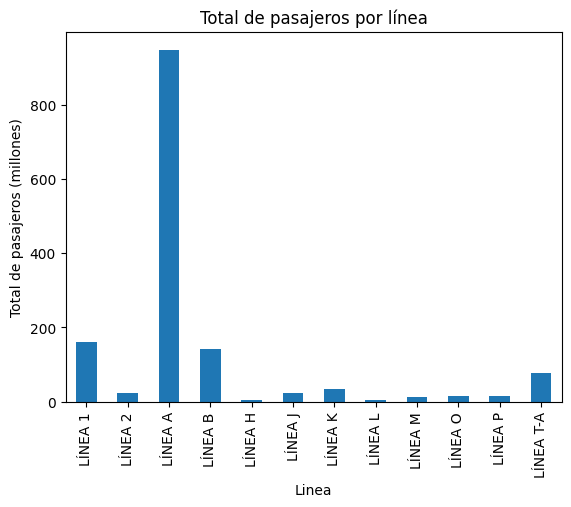

In [252]:
import matplotlib.ticker as ticker
ax = (df.groupby('Linea')['Total_pasajeros'].sum() / 1e6).plot(kind='bar')
plt.ylabel('Total de pasajeros (millones)')
plt.title('Total de pasajeros por línea')

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

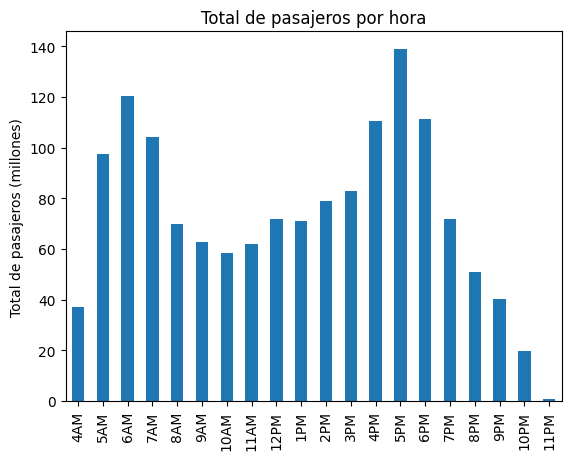

In [253]:
ax = (df.drop(columns=['Dia','Linea','Total_pasajeros','Festivo']).sum()/ 1e6).plot(kind='bar')
plt.ylabel('Total de pasajeros (millones)')
plt.title('Total de pasajeros por hora')

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

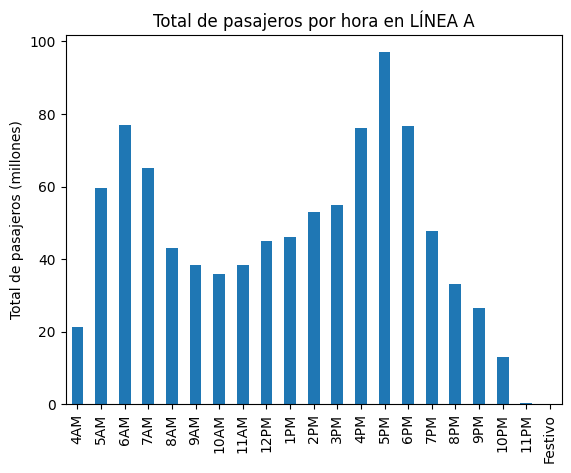

In [254]:
df_linea_a = df[df['Linea'] == 'LÍNEA A']

passengers_by_hour = (df_linea_a.drop(columns=['Dia', 'Linea', 'Total_pasajeros']).sum() / 1e6)

ax = passengers_by_hour.plot(kind='bar')
plt.ylabel('Total de pasajeros (millones)')
plt.title('Total de pasajeros por hora en LÍNEA A')

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [255]:
from ipywidgets import interact, Dropdown

#grafica interactiva
def update_plot(line):
    df_filtered = df[df['Linea'] == line]
    passengers_by_hour = (df_filtered.drop(columns=['Dia', 'Linea', 'Total_pasajeros']).sum() / 1e6)
    ax = passengers_by_hour.plot(kind='bar', figsize=(10, 5))
    plt.ylabel('Total de pasajeros (millones)')
    plt.title(f'Total de pasajeros por hora en {line}')
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.show()

interact(update_plot, line=Dropdown(options=df['Linea'].unique(), value='LÍNEA A', description='Linea:'))


interactive(children=(Dropdown(description='Linea:', index=2, options=('LÍNEA 1', 'LÍNEA 2', 'LÍNEA A', 'LÍNEA…

<function __main__.update_plot(line)>

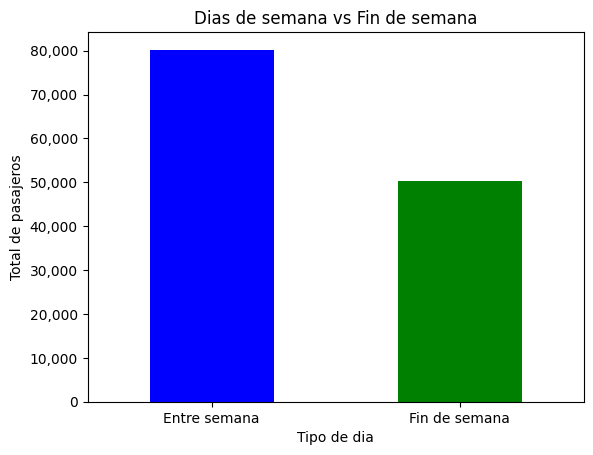

In [256]:
df['Dia'] = pd.to_datetime(df['Dia'], format='%d/%m/%Y')

#Nueva columna para el dia de la semana (0=Lunes, 6=Domingo)
df['Dia_semana'] = df['Dia'].dt.dayofweek

# Clasificar como dia de semana o fin de semana
df['Tipo de dia'] = df['Dia_semana'].apply(lambda x: 'Fin de semana' if x >= 5 else 'Entre semana')

passenger_summary = df.groupby('Tipo de dia')['Total_pasajeros'].mean()


ax = passenger_summary.plot(kind='bar', color=['blue', 'green'])
plt.ylabel('Total de pasajeros')
plt.title('Dias de semana vs Fin de semana')
plt.xticks(rotation=0)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()


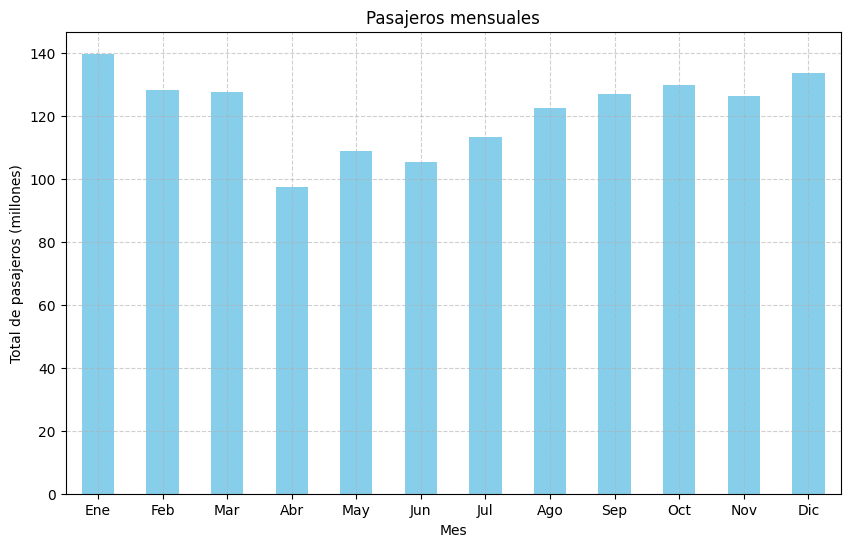

In [257]:
df['Dia'] = pd.to_datetime(df['Dia'])

# Extraemos los meses de la columna dia
df['Mes'] = df['Dia'].dt.month

#Flujo de pasajeros por mes
monthly_passenger_flow = df.groupby('Mes')['Total_pasajeros'].sum()/1e6

plt.figure(figsize=(10, 6))
monthly_passenger_flow.plot(kind='bar', color='skyblue')
plt.title('Pasajeros mensuales')
plt.xlabel('Mes')
plt.ylabel('Total de pasajeros (millones)')
plt.xticks(ticks=range(len(monthly_passenger_flow)), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [258]:
import numpy as np
df.replace('None', np.nan, inplace=True)

In [259]:
print(df.isna().sum())

Dia                   0
Linea                 0
4AM                3145
5AM                3000
6AM                2989
7AM                2945
8AM                 809
9AM                 114
10AM                122
11AM                112
12PM                113
1PM                 116
2PM                 119
3PM                 144
4PM                 129
5PM                 123
6PM                1133
7PM                1520
8PM                1512
9PM                1518
10PM               1814
11PM               8941
Total_pasajeros       0
Festivo               0
Dia_semana            0
Tipo de dia           0
Mes                   0
dtype: int64


In [260]:
print(df.isnull().sum())

Dia                   0
Linea                 0
4AM                3145
5AM                3000
6AM                2989
7AM                2945
8AM                 809
9AM                 114
10AM                122
11AM                112
12PM                113
1PM                 116
2PM                 119
3PM                 144
4PM                 129
5PM                 123
6PM                1133
7PM                1520
8PM                1512
9PM                1518
10PM               1814
11PM               8941
Total_pasajeros       0
Festivo               0
Dia_semana            0
Tipo de dia           0
Mes                   0
dtype: int64


In [261]:
for col in df.columns[2:22]:
    df[col] = df[col].fillna(df[col].mean())
    df[col] = df[col].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20395 entries, 0 to 20394
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Dia              20395 non-null  datetime64[ns]
 1   Linea            20395 non-null  object        
 2   4AM              20395 non-null  int64         
 3   5AM              20395 non-null  int64         
 4   6AM              20395 non-null  int64         
 5   7AM              20395 non-null  int64         
 6   8AM              20395 non-null  int64         
 7   9AM              20395 non-null  int64         
 8   10AM             20395 non-null  int64         
 9   11AM             20395 non-null  int64         
 10  12PM             20395 non-null  int64         
 11  1PM              20395 non-null  int64         
 12  2PM              20395 non-null  int64         
 13  3PM              20395 non-null  int64         
 14  4PM              20395 non-null  int64

In [262]:
df.isnull().sum()

Dia                0
Linea              0
4AM                0
5AM                0
6AM                0
7AM                0
8AM                0
9AM                0
10AM               0
11AM               0
12PM               0
1PM                0
2PM                0
3PM                0
4PM                0
5PM                0
6PM                0
7PM                0
8PM                0
9PM                0
10PM               0
11PM               0
Total_pasajeros    0
Festivo            0
Dia_semana         0
Tipo de dia        0
Mes                0
dtype: int64

In [263]:
df['Total_pasajeros'] = pd.to_numeric(df['Total_pasajeros'], errors='coerce')
df['Year'] = df['Dia'].dt.year
df['Year'] = df['Year'].astype('category')
df['Tipo de dia'] = df['Tipo de dia'].astype('category')
df['Dia_semana'] = df['Dia_semana'].astype('category')
df['Mes'] = df['Mes'].astype('category')
df['Linea'] = df['Linea'].astype('category')
print(df.dtypes)

Dia                datetime64[ns]
Linea                    category
4AM                         int64
5AM                         int64
6AM                         int64
7AM                         int64
8AM                         int64
9AM                         int64
10AM                        int64
11AM                        int64
12PM                        int64
1PM                         int64
2PM                         int64
3PM                         int64
4PM                         int64
5PM                         int64
6PM                         int64
7PM                         int64
8PM                         int64
9PM                         int64
10PM                        int64
11PM                        int64
Total_pasajeros             int64
Festivo                      bool
Dia_semana               category
Tipo de dia              category
Mes                      category
Year                     category
dtype: object


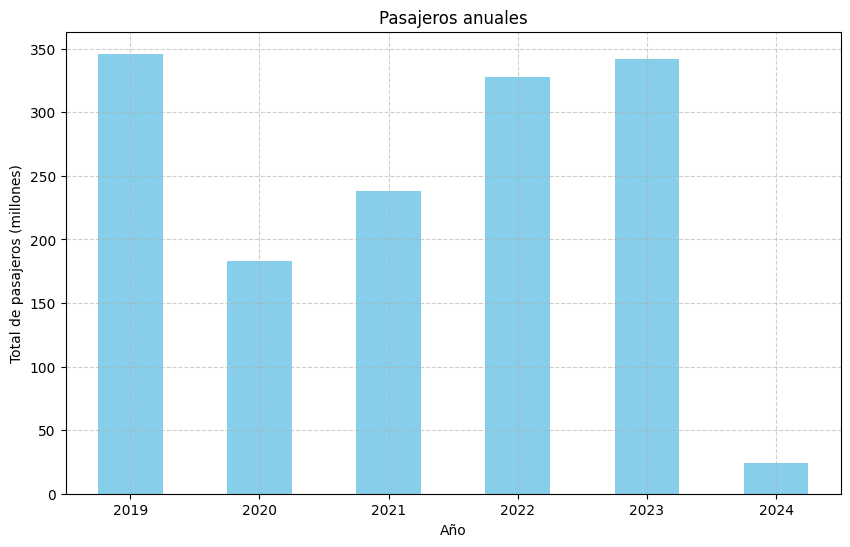

In [264]:
pasajeros_anuales = df.groupby('Year')['Total_pasajeros'].sum()/1e6

plt.figure(figsize=(10, 6))
pasajeros_anuales.plot(kind='bar', color='skyblue')
plt.title('Pasajeros anuales')
plt.xlabel('Año')
plt.ylabel('Total de pasajeros (millones)')
plt.xticks(ticks=range(len(pasajeros_anuales)), labels=['2019', '2020', '2021', '2022', '2023', '2024'], rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [265]:
from matplotlib.ticker import FuncFormatter

def update_plot(year):
    df_filtered = df[df['Year'] == year]

    monthly_passenger_flow = df_filtered.groupby('Mes')['Total_pasajeros'].sum() / 1e6

    ax = monthly_passenger_flow.plot(kind='bar', figsize=(10, 5), title=f'Total de pasajeros por mes en {year}')
    plt.ylabel('Total de pasajeros (millones)')
    ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.xticks(ticks=range(len(monthly_passenger_flow)), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
    plt.show()

year_options = df['Year'].unique()
default_year = year_options[0] if len(year_options) > 0 else None

interact(update_plot, year=Dropdown(options=year_options, value=default_year, description='Year:'))


interactive(children=(Dropdown(description='Year:', options=(2019, 2020, 2021, 2022, 2023, 2024), value=2019),…

<function __main__.update_plot(year)>

In [266]:
import plotly.express as px

fig = px.scatter(df, x='Dia', y='Total_pasajeros', hover_data=['Dia_semana'])
fig.show()

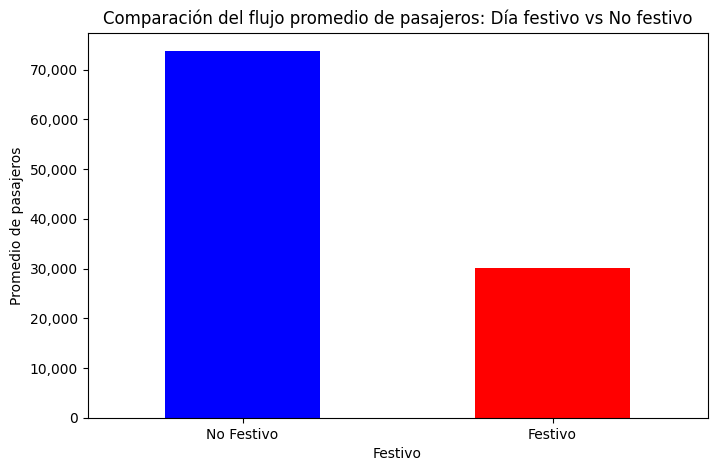

In [267]:
passenger_summary = df.groupby('Festivo')['Total_pasajeros'].mean()

ax = passenger_summary.plot(kind='bar', color=['blue', 'red'], figsize=(8, 5))
plt.ylabel('Promedio de pasajeros')
plt.title('Comparación del flujo promedio de pasajeros: Día festivo vs No festivo')
plt.xticks([0, 1], ['No Festivo', 'Festivo'], rotation=0)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [268]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers


outliers = find_outliers_IQR(df["5PM"])
print('Cantidad de outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

Cantidad de outliers: 2269
max outlier value: 191245
min outlier value: 11053


<Axes: >

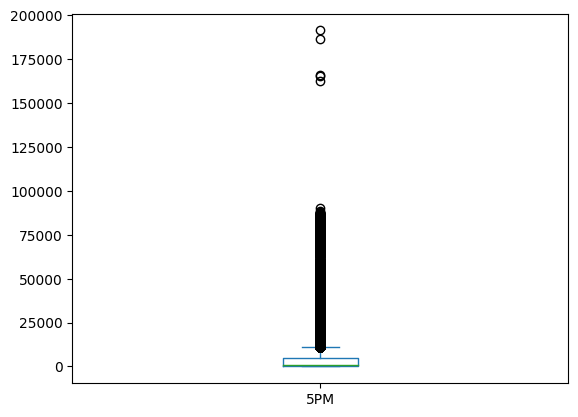

In [269]:
df['5PM'].plot(kind='box')

In [270]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Total_pasajeros ~ C(Year)', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

anova_df = pd.DataFrame(anova_results)

formatted_anova = anova_df.style.format({
    'sum_sq': "{:,.2f}",
    'df': "{:.0f}",
    'F': "{:.2f}",
    'PR(>F)': "{:.4f}"
}).set_caption("ANOVA Table").set_table_styles([{
    'selector': 'caption',
    'props': [('color', 'red'), ('font-size', '16px')]
}])

formatted_anova


,sum_sq,df,F,PR(>F)
C(Year),"5,451,560,126,140.23",5,44.99,0.0000
Residual,"494,092,353,991,412.38",20389,nan,nan


In [271]:
def interpret_anova_results(anova_table):
    p_value = anova_table.loc['C(Year)', 'PR(>F)']
    alpha = 0.05  #Nivel de significancia

    print("\nANOVA Results Interpretation:")
    if p_value < alpha:
        print(f"The p-value ({p_value:.4f}) is less than the significance level ({alpha}), suggesting that there is a statistically significant difference in 'Total_pasajeros' across different 'Year'.")
        print("We reject the null hypothesis that there is no year-to-year variation in total passengers.")
    else:
        print(f"The p-value ({p_value:.4f}) is greater than the significance level ({alpha}), suggesting that there is no statistically significant difference in 'Total_pasajeros' across different 'Year'.")
        print("We fail to reject the null hypothesis that there is no year-to-year variation in total passengers.")

interpret_anova_results(anova_results)



ANOVA Results Interpretation:
The p-value (0.0000) is less than the significance level (0.05), suggesting that there is a statistically significant difference in 'Total_pasajeros' across different 'Year'.
We reject the null hypothesis that there is no year-to-year variation in total passengers.


In [272]:
from scipy.stats import shapiro, levene

# Normality test using Shapiro-Wilk Test
_, pval_normality = shapiro(model.resid)
print("Normality test p-value =", pval_normality)

Normality test p-value = 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



In [273]:
# Homoscedasticity test using Levene's Test
_, pval_homoscedasticity = levene(df['Total_pasajeros'][df['Year'] == 2019],
                                  df['Total_pasajeros'][df['Year'] == 2020],
                                  df['Total_pasajeros'][df['Year'] == 2021],
                                  df['Total_pasajeros'][df['Year'] == 2022],
                                  df['Total_pasajeros'][df['Year'] == 2023],
                                  df['Total_pasajeros'][df['Year'] == 2024])
print("Homoscedasticity test p-value =", pval_homoscedasticity)


Homoscedasticity test p-value = 8.410787333370019e-39


# Web scraping

In [274]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [275]:
df.head()

,Dia,Linea,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,...,8PM,9PM,10PM,11PM,Total_pasajeros,Festivo,Dia_semana,Tipo de dia,Mes,Year
0,2019-01-01,LÍNEA 1,12,826,1134,987,884,975,1259,1348,...,2024,1257,271,5,28850,True,1,Entre semana,1,2019
1,2019-01-02,LÍNEA 1,1716,4498,6629,6284,4145,3784,3746,3854,...,2975,2709,1890,135,83484,False,2,Entre semana,1,2019
2,2019-01-03,LÍNEA 1,1860,4869,7587,7088,4483,4486,4126,4136,...,3244,2905,1739,124,90472,False,3,Entre semana,1,2019
3,2019-01-04,LÍNEA 1,1845,4989,7723,7281,4857,4583,4269,4217,...,3466,3075,1900,176,93067,False,4,Entre semana,1,2019
4,2019-01-05,LÍNEA 1,1550,3852,4898,5221,4016,3815,3704,4048,...,2973,2866,1983,167,75451,False,5,Fin de semana,1,2019
